<a href="https://colab.research.google.com/github/ShreshthSaxena/Digital-Image-Processing/blob/master/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from PIL import Image

img = Image.open("princeton_small.jpg")

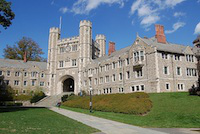

In [2]:
img

## Luminance Operations

### Brightness

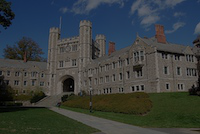

In [19]:
#@title Select Value
B = 0 #@param {type:"slider", min:0, max:2, step:0.5}
img_array=np.array(img,dtype=np.float32)
img_array = img_array * B
img_array = np.clip(img_array, 0, 255)
img_array = img_array.astype(np.uint8)

Image.fromarray(img_array)
#img.save('boat1.jpg')

### Contrast

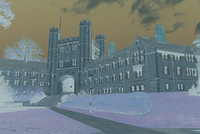

In [36]:
#@title Select Alpha
alpha = -0.5 #@param {type:"slider", min:-0.5, max:1.5, step:0.5}
img_array=np.array(img,dtype=np.float32)
gray = np.copy(img_array)
gray[:,:,0] = np.mean(img_array[:,:,0])
gray[:,:,1] = np.mean(img_array[:,:,1])
gray[:,:,2] = np.mean(img_array[:,:,2])

img_array = (1-alpha)*gray + alpha*img_array 
img_array = np.clip(img_array, 0, 255)
img_array = img_array.astype(np.uint8)

Image.fromarray(img_array)

## Linear Filtering Operations

In [0]:
from skimage.exposure import rescale_intensity

def convolve(image, kernel):
  (iH, iW) = image.shape[:2]
  (kH, kW) = kernel.shape[:2]
  pad = (kW - 1) // 2
  image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
    cv2.BORDER_REPLICATE)
  output = np.zeros((iH, iW, 3), dtype="float32")
  for channel in range(3):
    for y in np.arange(pad, iH + pad):
      for x in np.arange(pad, iW + pad):
        roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1,channel]
        k = (roi * kernel).sum()
        output[y - pad, x - pad, channel] = k
  # rescale the output image to be in the range [0, 255]
  output = rescale_intensity(output, in_range=(0, 255))
  output = (output * 255).astype("uint8")

  # return the output image
  return output

### BLUR

In [0]:
import math
sigma = 0.5
k = math.ceil(3*sigma)*2+1
img_array = np.array(img,dtype=np.float32)

# padded = np.zeros((img_array.shape[0]+k-1,img_array.shape[1]+k-1,3))
# for channel in range(img_array.shape[2]):  
#   for i in range(img_array.shape[0]):
#     for j in range(img_array.shape[1]):
#       padded[i+1,j+1,channel] = img_array[i,j,channel]

x, y = np.meshgrid(np.linspace(-1,1,k), np.linspace(-1,1,k))
d = np.sqrt(x**2+y**2)
g = np.exp(-( (x**2 + y**2)/ ( 2.0 * sigma**2 ) ) )
g = g/ g.sum()

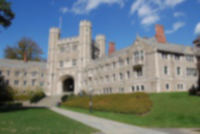

In [53]:
out = convolve(img_array, g)
out = out.astype(np.uint8)

Image.fromarray(out)

### Sharpen

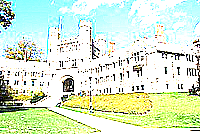

In [79]:
kernel = np.array([[-1,-1,-1], [-1,11,-1], [-1,-1,-1]])
img_array = np.array(img,dtype=np.float32)
sharp = convolve(img_array, kernel)

sharp = sharp.astype(np.uint8)
Image.fromarray(sharp)

### Edge Detection

In [0]:
Hx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])

Hy = np.array([[-1, -2, -1],
               [0, 0, 0],
               [1, 2, 1]])
img_array = np.array(img,dtype=np.float32)

img_x = convolve(img_array, Hx) / 8.0
img_y = convolve(img_array, Hy) / 8.0

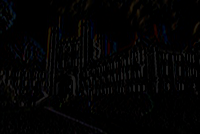

In [90]:
img_x = img_x.astype(np.uint8)
Image.fromarray(img_x)

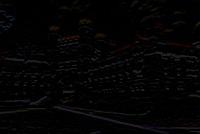

In [91]:
img_y = img_y.astype(np.uint8)
Image.fromarray(img_y)

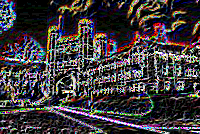

In [101]:
# img_out = np.sqrt(np.power(img_x, 2) + np.power(img_y, 2))
# img_out = (img_out / np.max(img_out)) * 255

img_out = img_x + img_y
img_out = img_out.astype(np.uint8)
img_array = np.clip(img_array, 0, 255)
Image.fromarray(img_out)

### Resize

In [0]:
#@title Select Values
sx = 2 #@param {type:"integer"}
sy = 2 #@param {type:"integer"}
interp = "cv.INTER_CUBIC " #@param ["cv.INTER_LINEAR", "cv.INTER_AREA", "cv.INTER_CUBIC "]


import cv2
img = cv2.imread('princeton_small.jpg')
resized = cv2.resize(img, None, fx =sx , fy =sy)


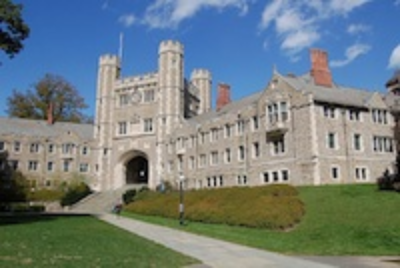

In [116]:
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

## Composite Images

In [0]:
top = cv2.imread("comp_foreground.jpg")
base = cv2.imread("comp_background.jpg")
mask = cv2.imread("comp_mask.jpg")

In [0]:
ret,thresh_img = cv2.threshold(mask,127,255,cv2.THRESH_BINARY)

In [0]:
out = np.zeros((top.shape[0], top.shape[1], 3),  dtype="float32")

In [0]:
for i in range(out.shape[0]):
  for j in range(out.shape[1]):
    if mask[i,j,0] == 0:
      out[i,j] = base[i,j]
    else:
      out[i,j] = top[i,j]

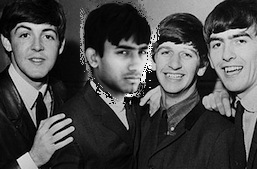

In [176]:
cv2_imshow(out)